<a href="https://colab.research.google.com/github/cbernet/introduction_machine_learning/blob/master/notebooks/supervised_learning/xgboost_housing_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of the Housing Prices in California with XGBoost

## The dataset 

The data is drawn from the 1990 US. Census, and is described [here](https://developers.google.com/machine-learning/crash-course/california-housing-data-description), albeit not with the same variable names as the ones you'll see below. No worries, the correspondance should be easy. 

In this notebook, we'll see how to predict housing price from the 8 other variables available in the dataset. 

First, we download the dataset with scikit-learn: 


In [2]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [3]:
dataset

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

**exercise:**

Use numpy to : 

* find out how many individual examples are featured in the dataset

Use matplotlib to : 

* plot the distribution of each variable in an histogram with `pyplot.hist`. Make sure to adapt the number of bins and the histogram range.
* look at the correlation between variables and the price with `pyplot.hist2D`. Again, make sure to adapt the binning and the range. 
* Apart from latitude and longitude, which variable is the most correlated with the target price ? 


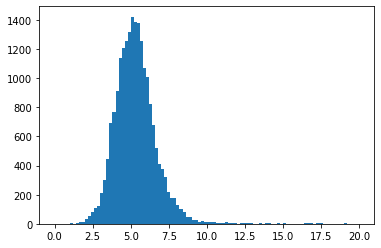

In [8]:
import matplotlib.pyplot as plt 
_ = plt.hist(dataset['data'][:, 2], bins=100, range=(0,20))

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <matplotlib.collections.QuadMesh at 0x7f3b6c860208>)

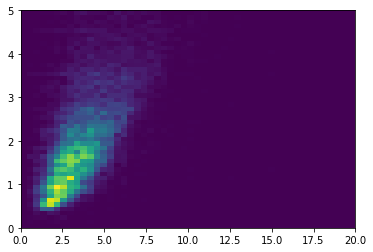

In [13]:
plt.hist2d(dataset['data'][:,0], dataset['target'], bins=(50,50), range=((0,20),(0,5)))

## Dataset discovery with pandas and seaborn

When working with numpy arrays and structured data, it's often easier to use `pandas` as an interface. This tool allows you to : 

* label colums 
* slice through the array
* perform any operation you would typically do with Excel (groupby, select, join, ...)

We start by importing pandas and creating a pandas dataframe form our numpy arrays:

In [14]:
import pandas as pd

In [21]:
# create the dataframe
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
# adding the price, which is in a separate numpy array
df['price'] = dataset['target']

In [18]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Pandas features an easy (but limited) plotting interface:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b64c12be0>]],
      dtype=object)

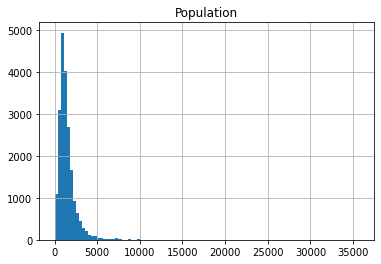

In [26]:
df.hist('Population', bins=100)

Also, pandas makes it possible to use seaborn for advanced visualization: 

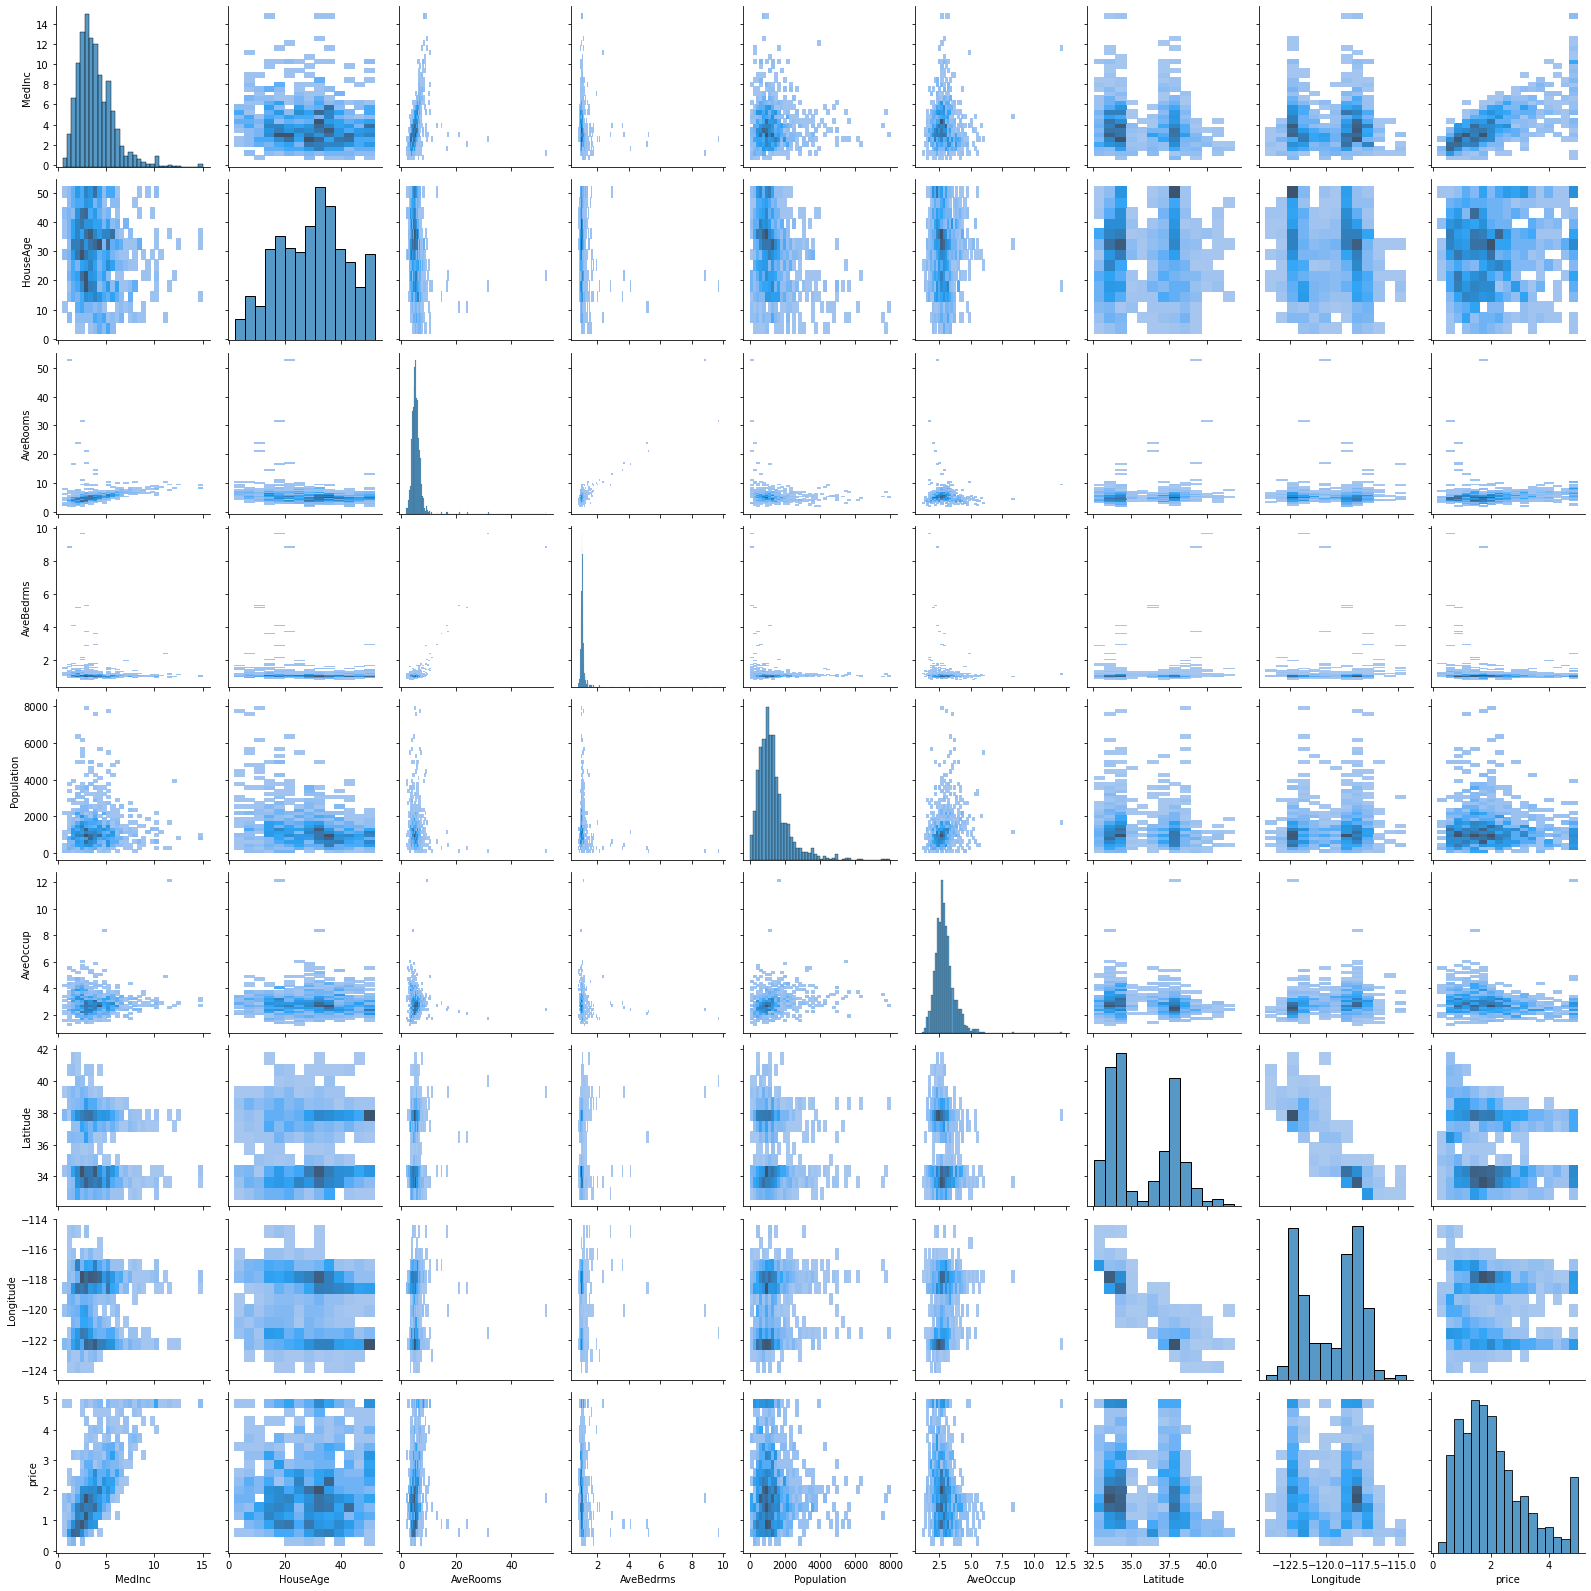

In [30]:
import seaborn as sns
# seaborn is not efficient, so limiting the plot to 
# a random subset of 1000 samples
sns.pairplot(df.sample(1000), kind='hist')

We see that some of the distributions have outliers. 

Usually, before attempting to use a dataset for machine learning, we would first have a look at these outliers and possibly exclude some of the outliers from the dataset. Indeed, most of the time, outliers are due to errors in the dataset. 

But in this tutorial about XGBoost, we have no time for this, and we will directly move on to the prediction. 

## XGBoost regression

We start by defining x and y arrays, for the example features and the targets, respectively: 

In [229]:
x = dataset['data']
y = dataset['target']
print(x.shape)
print(y.shape)

(20640, 8)
(20640,)


Then, we create our XGBoost model. For this, we use the scikit-learn interface to XGBoost regression, the `XGBoostRegressor`: 

In [237]:
from xgboost import XGBRegressor
param = {'max_depth':3, 
         'gamma':0, 
         'min_child_weight':1,
         'learning_rate':0.3, 
         'n_jobs':1, 
         'objective':'reg:squarederror', 
         'n_estimators':10}

bst = XGBRegressor(**param)

Here, we started with a basic set of parameters for a relatively simple model. We'll see what they give, and you will optimize these parameters later on. 

So let's fit the model: 

In [238]:
bst.fit(x, y, verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Now that the model has been trained, let's predict prices for the whole dataset: 

In [239]:
preds = bst.predict(x)

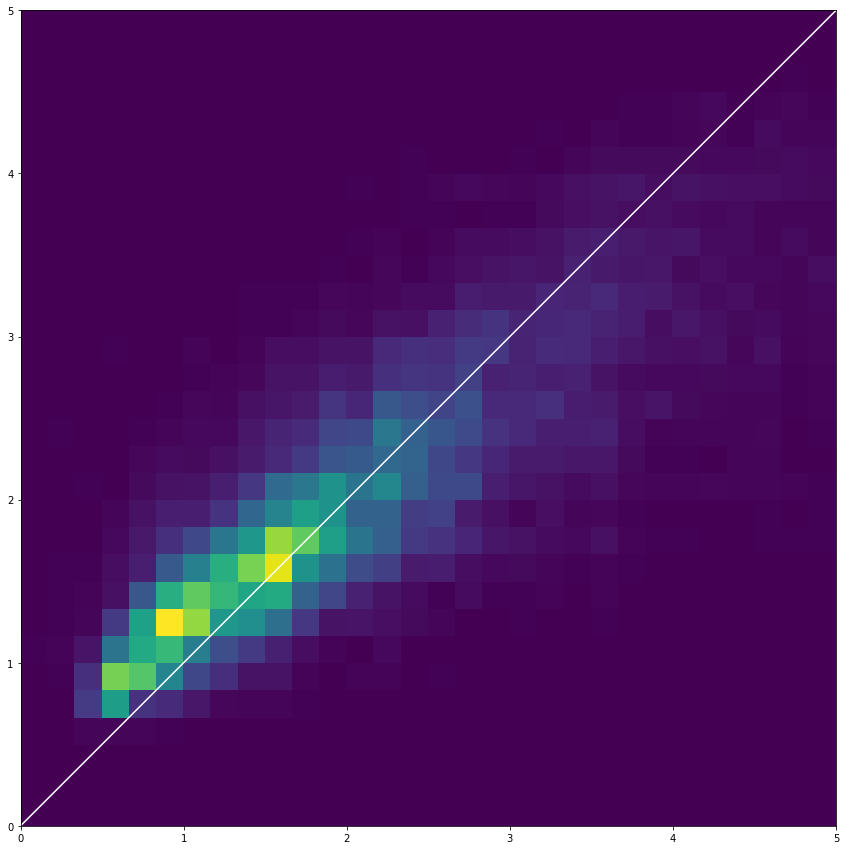

In [240]:
import matplotlib.pyplot as plt

def plot(target, preds):
  fig = plt.figure( figsize=(15,15))
  ax = fig.add_subplot(111)
  _ = plt.hist2d(target, preds, bins=(30,30), range=((0,5), (0,5)))
  plt.plot([0,5], [0,5], 'w-')
  ax.set_aspect('equal')

plot(y, preds)

Not too bad already, even though the model is extremely simple! 

Here is how to look at the variable importance:

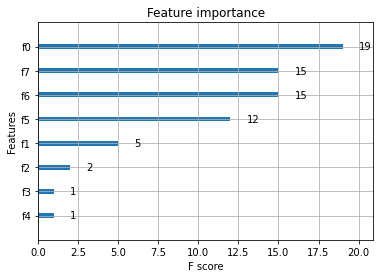

In [241]:
import xgboost as xgb
xgb.plot_importance(bst)

**Exercise** : 

* Look again at the definitions of the variables. do you understand why the top variables are important ? 

Our model features only 10 trees. Here is how to print one of them : 

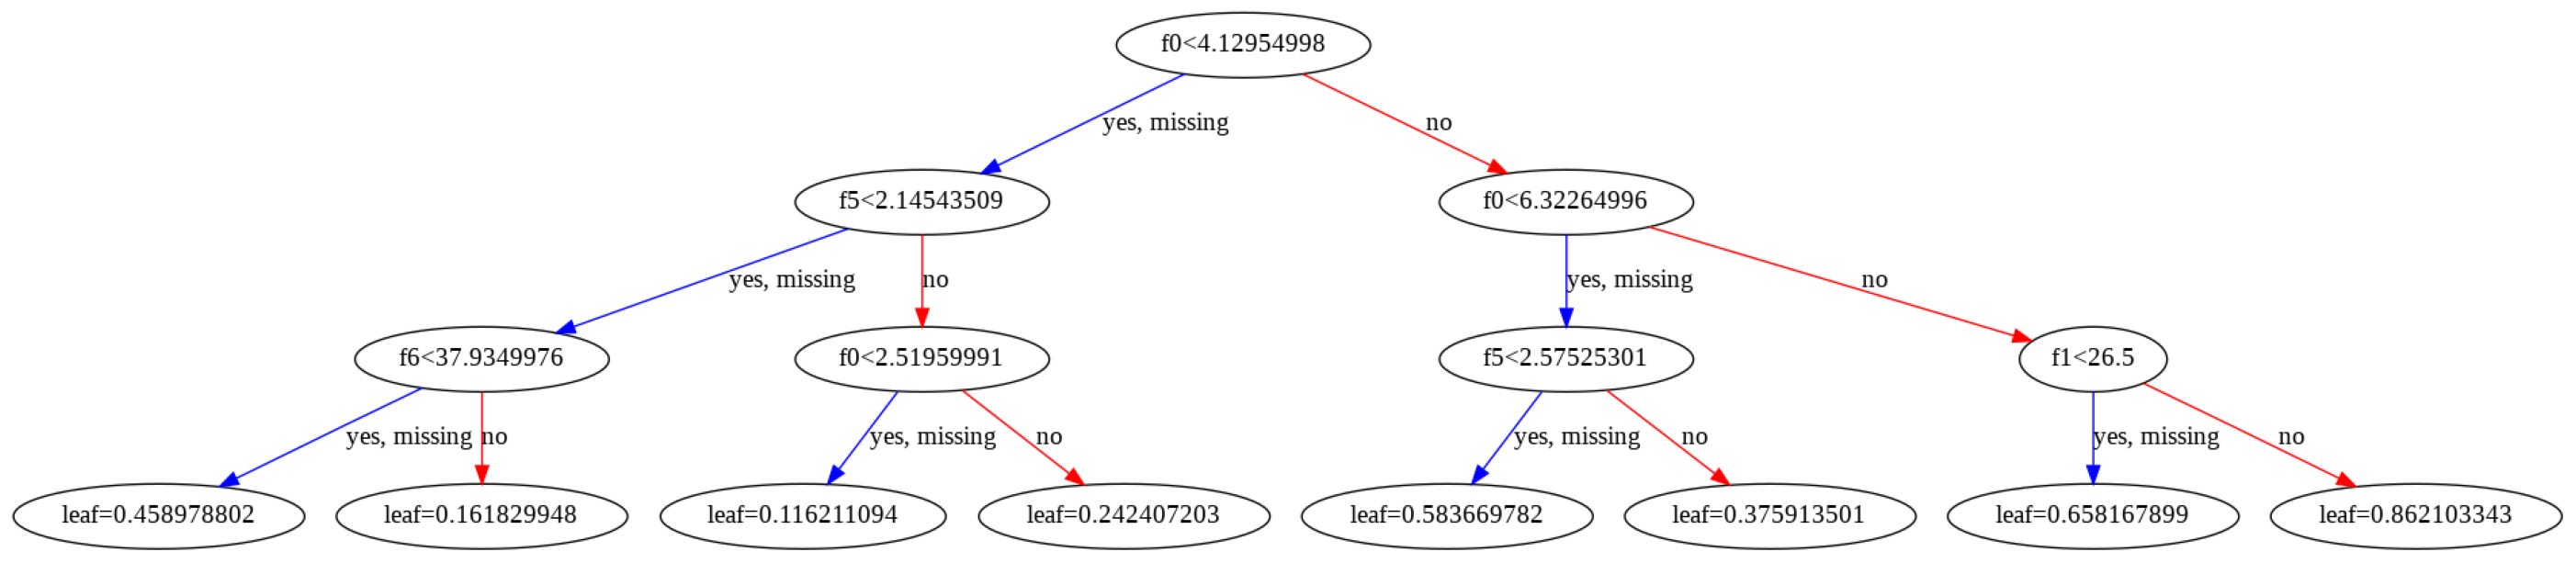

In [242]:
fig = plt.figure(figsize=(50,20))
ax = fig.add_subplot(111)
xgb.plot_tree(bst, ax=ax, num_trees=1)

**Exercise** : 

* Tune the model parameters to get a better fit (by eye)

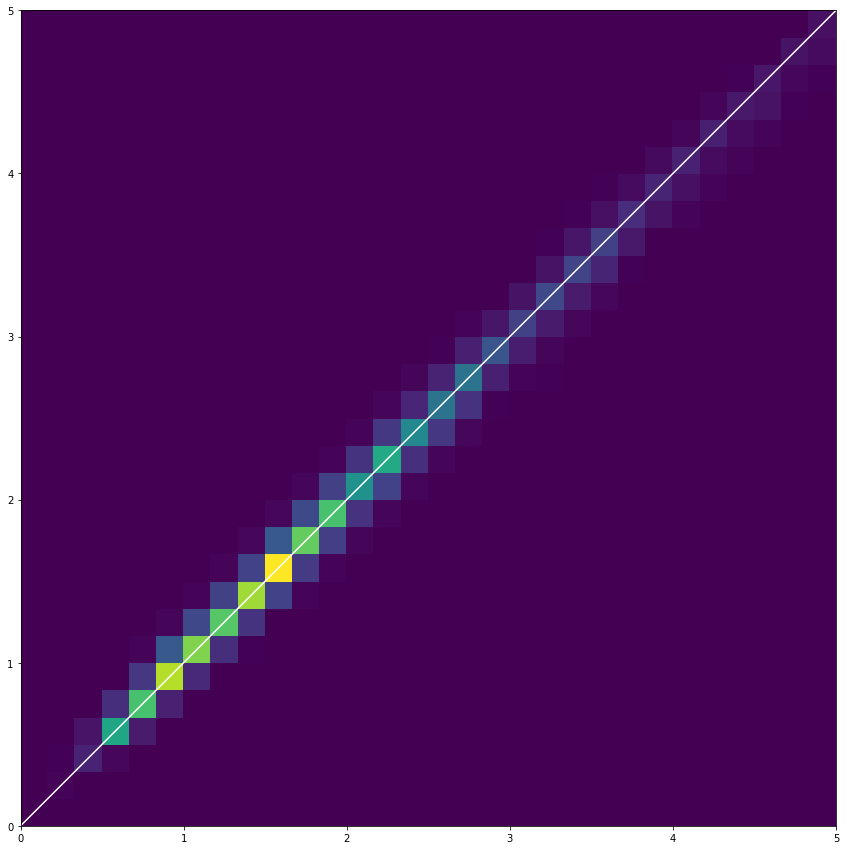

In [243]:
from xgboost import XGBRegressor
param = {'max_depth':10, 
         'gamma':0, 
         'min_child_weight':1,
         'learning_rate':0.3, 
         'n_jobs':1, 
         'objective':'reg:squarederror', 
         'n_estimators':100}

bst = XGBRegressor(**param)
bst.fit(x, y, verbose=True)
preds = bst.predict(x)
plot(y, preds)

## Overfitting : train and test datasets

It could very well be that your model overfits, and we have no way to check this, since we used the full dataset to train the model ! 

So now, let's split the dataset into a train and a test dataset:

In [244]:
x_train = x[:-5000]
y_train = y[:-5000]
x_test = x[-5000:]
y_test = y[-5000:]

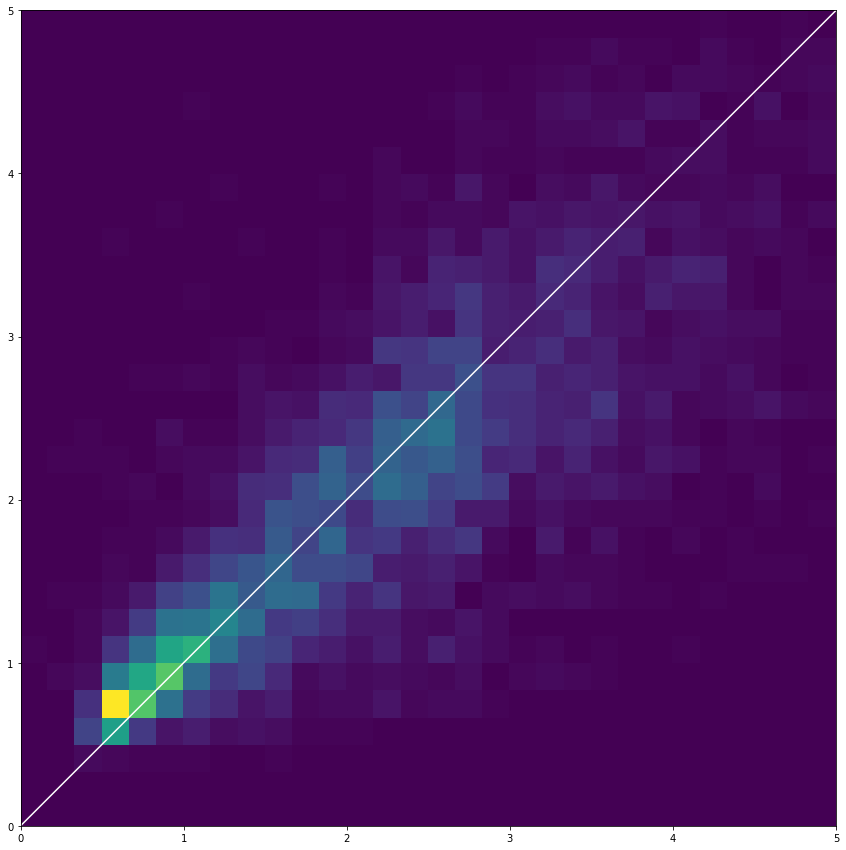

In [245]:
from xgboost import XGBRegressor

bst = XGBRegressor(**param)
bst.fit(x_train, y_train, verbose=True)
preds = bst.predict(x_test)
plot(y_test, preds)

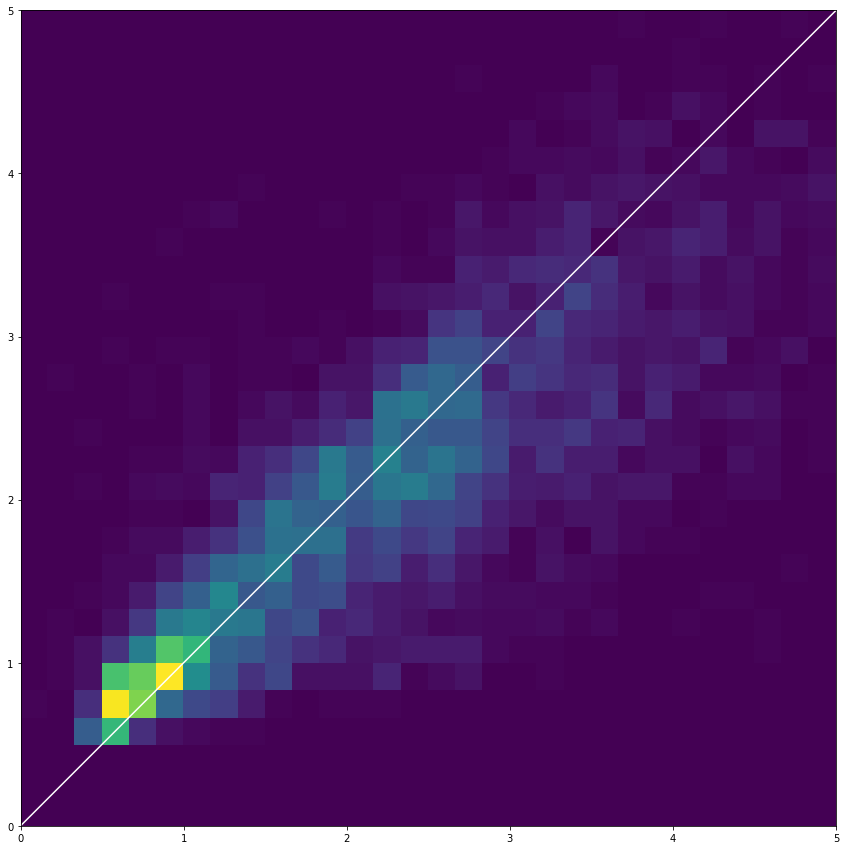

In [260]:
param = {'max_depth':8, 
         'gamma' : 0,
         'min_child_weight': 70, 
         'learning_rate':0.05, 
         'n_jobs':1, 
         'objective':'reg:squarederror', 
         'n_estimators':200}

bst = XGBRegressor(**param)
bst.fit(x_train, y_train, verbose=True)
preds = bst.predict(x_test)
plot(y_test, preds)


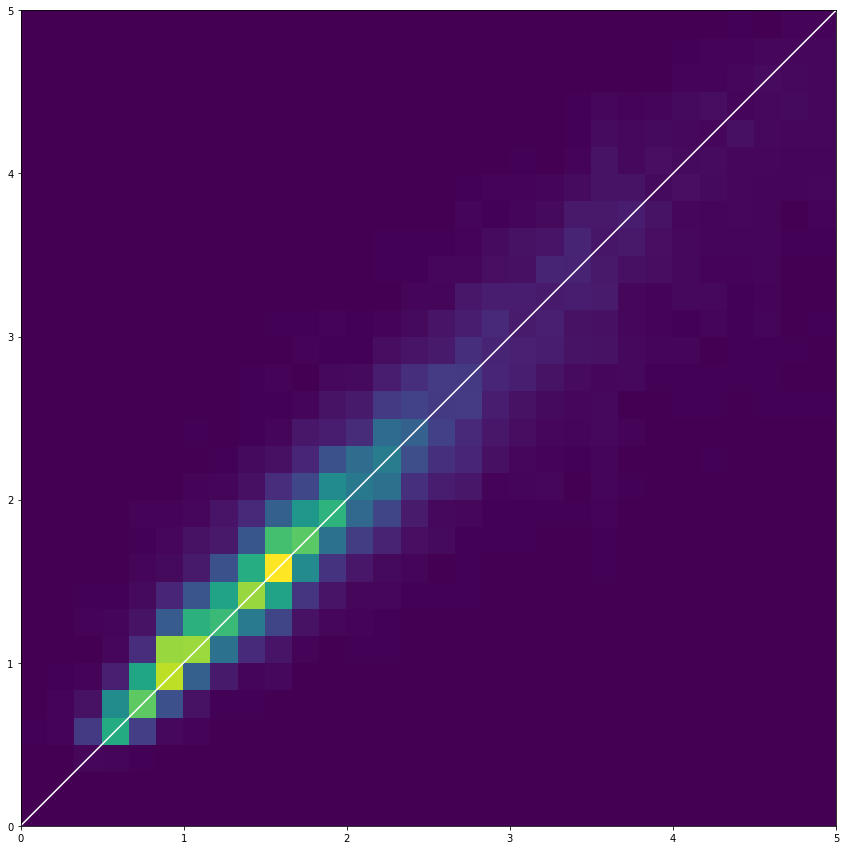

In [261]:
preds = bst.predict(x_train)
plot(y_train, preds)

A simpler model appears to perform better on the test dataset.

Again, in this simple introduction, we are judging of the results by eye, and we are trying things on the blind. 

In practice, people use well-defined metrics and libraries such as [hyperopt](https://github.com/hyperopt/hyperopt) to optimize hyperparameters. 